# Final Project Group 12 - Dự đoán giá kim cương

## 1. Import các thư viện cần thiết

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from __future__ import division, print_function, unicode_literals
import numpy as np

## 2. Đọc dữ liệu

### 2.1. Tổng quan về dữ liệu

In [145]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv("diamonds.csv")

data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [79]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


- Dữ liệu gồm có 11 cột, có 53940 dòng dữ liệu, trong đó có 6 cột dữ liệu kiểu float, 2 cột kiểu int và 3 cột kiểu object
- Các cột đều đầy đủ dữ liệu và không có dữ liệu null

### 2.2. Đánh giá mô hình

Giá trị trung bình của biến output

In [149]:
# Tính giá trị trung bình của cột 'price'
average_price = data['price'].mean()

print("Giá trị trung bình của cột 'price' là:", average_price)

Giá trị trung bình của cột 'price' là: 3932.799721913237


==> Để đánh giá mô hình tốt:
- R² trên 80%
- MSE thấp hơn được coi là tốt hơn
- MAE sấp sỉ hoặc thấp hơn 787(20% của giá trị trung bình)

## 3. Tiền xử lí dữ liệu

### 3.1. Drop cột Unnamed

In [80]:
#Drop cột đầu tiên Unnamed
data = data.drop(["Unnamed: 0"], axis=1)
data.shape

(53940, 10)

### 3.2. Xử lí với các cột x,y,z

Giá trị nhỏ nhất của "x", "y", "z" là 0, điều này cho thấy có các giá trị dữ liệu lỗi đại diện cho kim cương không có kích thước hoặc là kim cương hai chiều. Vì vậy, chúng ta cần loại bỏ những giá trị đó vì chúng là các điểm dữ liệu lỗi .

In [81]:
#Drop các dữ liệu có x,y,z bằng 0
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

### 3.3. Vẽ biểu đồ phân tán với biến output và loại bỏ các outlier

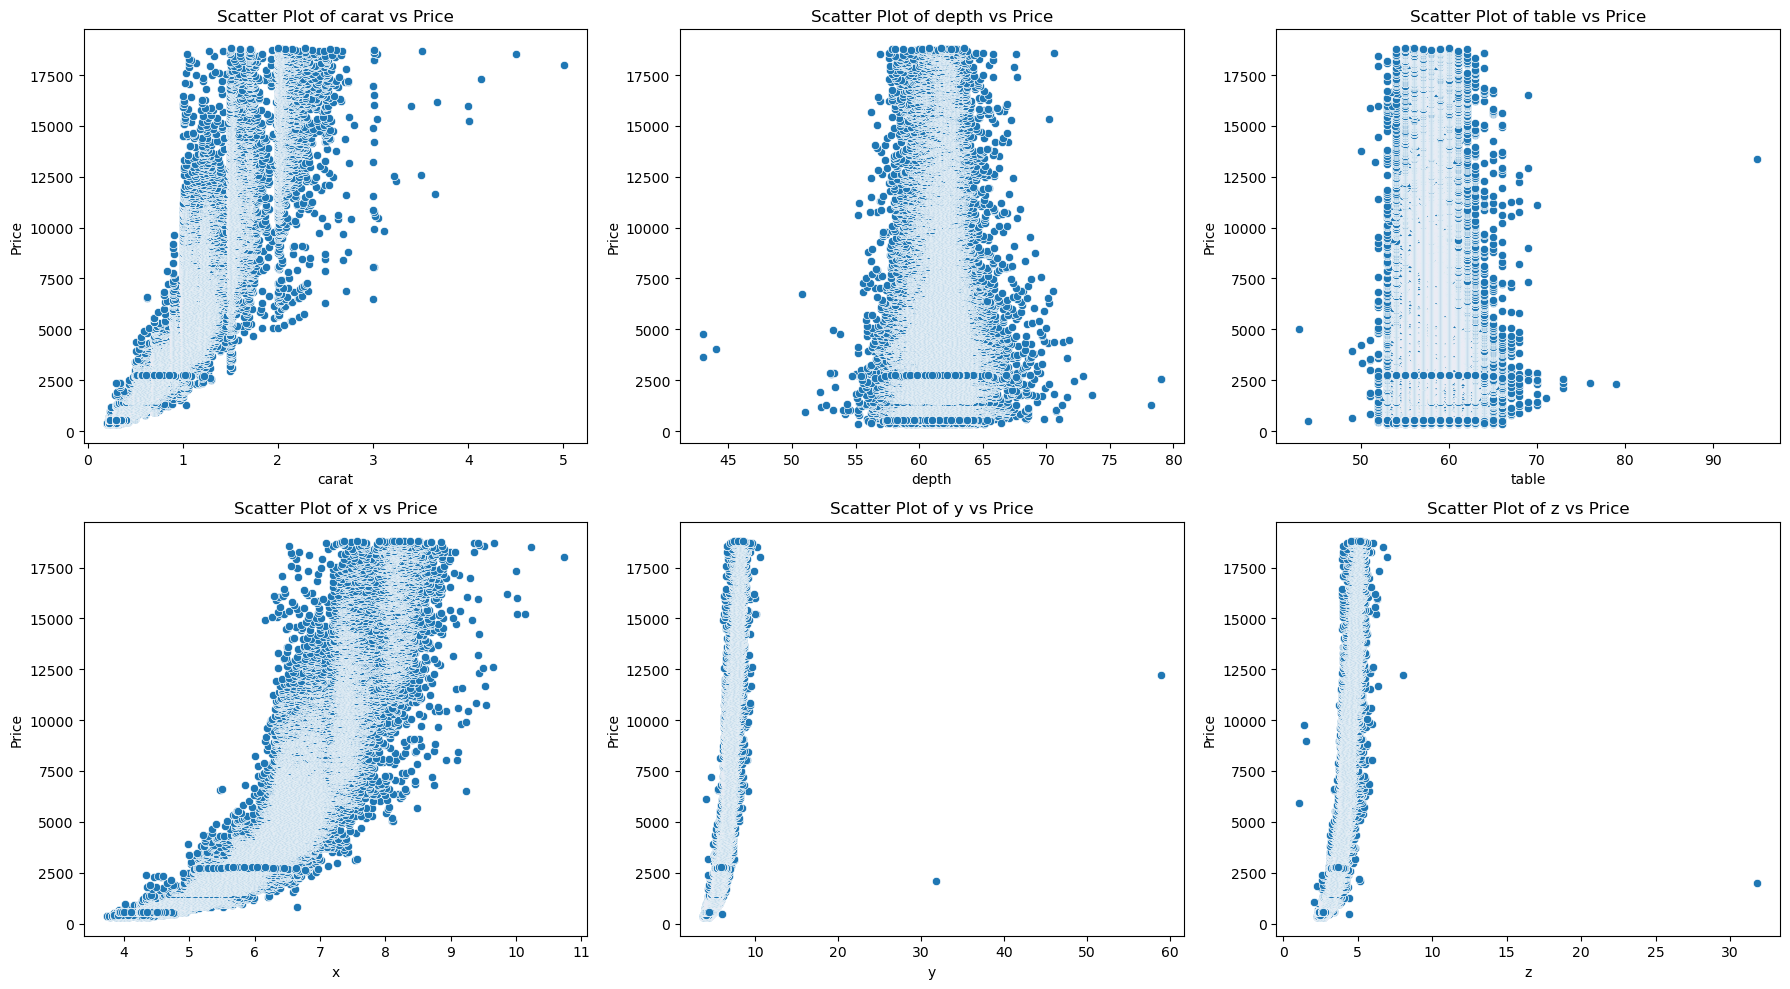

In [82]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Danh sách các biến cần vẽ
features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Vẽ biểu đồ phân tán cho từng biến so với 'price'
for feature, ax in zip(features, axes.flatten()):
    sns.scatterplot(data=data, x=feature, y='price', ax=ax)
    ax.set_title(f'Scatter Plot of {feature} vs Price')
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')

plt.tight_layout()
plt.show()

Thực hiện chọn ra các vùng của các thuộc tính tốt nhất để loại bỏ các outlier

In [83]:
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

### 3.4. Thực hiện mã hóa các biến catagory

In [84]:
label_data = data.copy()
label_encoder = LabelEncoder()
for col in ['cut', 'color', 'clarity']:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


### Hoàn tất tiền xử lí dữ liệu

## 4. Áp dụng mô hình

In [85]:
#Chia dữ liệu
X = label_data.drop(columns=['price'])
y = label_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Labels counts in y:', len(y))
print('Labels counts in y_train:', len(y_train))
print('Labels counts in y_test:', len(y_test))

Labels counts in y: 53907
Labels counts in y_train: 43125
Labels counts in y_test: 10782


In [86]:
results_test = {}
results_train = {}
results_val = {}

### 4.1. K-NN

Text(0, 0.5, 'MSE')

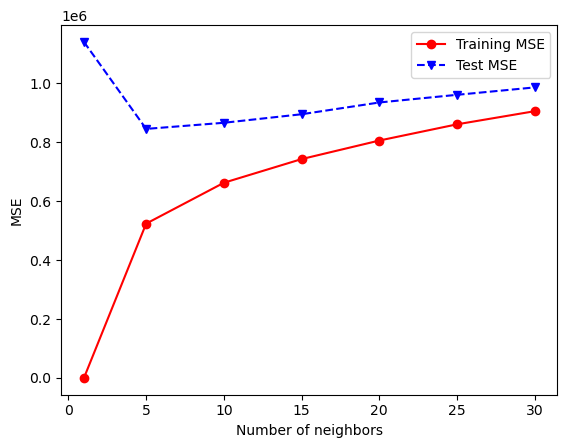

In [87]:
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainMSE = []
testMSE = []

for k in numNeighbors:
    reg = KNeighborsRegressor(n_neighbors=k, metric='minkowski', p=2)
    reg.fit(X_train, y_train)
    y_predTrain = reg.predict(X_train)
    y_predTest = reg.predict(X_test)
    trainMSE.append(mean_squared_error(y_train, y_predTrain))
    testMSE.append(mean_squared_error(y_test, y_predTest))

plt.plot(numNeighbors, trainMSE, 'ro-', numNeighbors, testMSE,'bv--')
plt.legend(['Training MSE','Test MSE'])
plt.xlabel('Number of neighbors')
plt.ylabel('MSE')

Khoảng từ 5 tới 10 là tốt nhất, chọn k = 5

In [88]:
model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

results_train['K-NN'] = [
    r2_score(y_train, y_train_pred),
    mean_squared_error(y_train, y_train_pred),
    mean_absolute_error(y_train, y_train_pred)
]

results_test['K-NN'] = [r2, mse, mae]

print(f'R-squared (R²): {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

R-squared (R²): 0.9443819084939784
Mean Squared Error (MSE): 844710.9666852161
Mean Absolute Error (MAE): 479.17529215358934


### 4.2. Linear Regression, Regularization với Ridge, Lasso, và ElasticNet

#### 4.2.1. Linear Regression

In [89]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

results_train['Linear Regression'] = [
    r2_score(y_train, y_train_pred),
    mean_squared_error(y_train, y_train_pred),
    mean_absolute_error(y_train, y_train_pred)
]

results_test['Linear Regression'] = [r2, mse, mae]

print(f'R-squared (R²): {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

R-squared (R²): 0.8843404413330281
Mean Squared Error (MSE): 1756602.8420336137
Mean Absolute Error (MAE): 853.7813710659399


In [90]:
# Hiển thị các hệ số của dòng phù hợp nhất.
lr_coef = dict(zip(X.columns, np.transpose(model.coef_)))
lr_x = list(lr_coef.keys())
lr_y = list(lr_coef.values())
model.intercept_, lr_coef

(-646.0292279622049,
 {'carat': 11310.43158524261,
  'cut': 57.4474707887919,
  'color': -265.6053691933316,
  'clarity': 285.4704942697827,
  'depth': 116.17853979727956,
  'table': -85.73186063923531,
  'x': -1832.008963395363,
  'y': 3404.7405003180147,
  'z': -4595.211276691796})

#### 4.2.2. Ridge Linear Regression

In [91]:
# Tạo một Ridge Regression model với alpha = 0.01 
model = Ridge(alpha = 0.01)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

results_train['Ridge Linear Regression'] = [
    r2_score(y_train, y_train_pred),
    mean_squared_error(y_train, y_train_pred),
    mean_absolute_error(y_train, y_train_pred)
]

results_test['Ridge Linear Regression'] = [r2, mse, mae]

print(f'R-squared (R²): {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

R-squared (R²): 0.8843403331532061
Mean Squared Error (MSE): 1756604.485036449
Mean Absolute Error (MAE): 853.785606838426


In [92]:
# Tạo một dictionary cho các coefficient với tên biến là các key
ridge_coef = dict(zip(X.columns, np.transpose(model.coef_)))
ridge_x = list(ridge_coef.keys())
ridge_y = list(ridge_coef.values())
model.intercept_ ,ridge_coef

(-637.7204930131797,
 {'carat': 11310.085085766255,
  'cut': 57.45103100162715,
  'color': -265.6028312436413,
  'clarity': 285.4718342363687,
  'depth': 116.03654637344708,
  'table': -85.733529398047,
  'x': -1832.229449515561,
  'y': 3403.5937033983905,
  'z': -4592.767506230992})

#### 4.2.3. Lasso Linear Regression

In [93]:
# Tạo một Lasso Regression model với alpha = 0.01
model = Lasso(alpha=0.01)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

results_train['Lasso Linear Regression'] = [
    r2_score(y_train, y_train_pred),
    mean_squared_error(y_train, y_train_pred),
    mean_absolute_error(y_train, y_train_pred)
]

results_test['Lasso Linear Regression'] = [r2, mse, mae]

print(f'R-squared (R²): {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

R-squared (R²): 0.8843046530618873
Mean Squared Error (MSE): 1757146.383609615
Mean Absolute Error (MAE): 852.4100813885829


d:\Anaconda\envs\mlclass\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.829e+10, tolerance: 6.932e+07
  model = cd_fast.enet_coordinate_descent(


In [94]:
# Tạo một dictionary cho các coefficient với tên biến là các key
lasso_coef = dict(zip(X.columns, np.transpose(model.coef_)))
lasso_x = list(lasso_coef.keys())
lasso_y = list(lasso_coef.values())
model.intercept_ ,lasso_coef

(1193.9204807425317,
 {'carat': 11294.010713499256,
  'cut': 61.00086702353888,
  'color': -265.48164439901325,
  'clarity': 286.205349475364,
  'depth': 88.11768479537308,
  'table': -87.9393900150671,
  'x': -1436.4062583503567,
  'y': 2739.6689597655113,
  'z': -4152.718544147806})

#### 4.2.4. ElasticNet Linear Regression

In [95]:
# Tạo một ElasticNet Regression model với alpha = 0.01, l1_ratio = 0.5
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

results_train['ElasticNet Linear Regression'] = [
    r2_score(y_train, y_train_pred),
    mean_squared_error(y_train, y_train_pred),
    mean_absolute_error(y_train, y_train_pred)
]

results_test['ElasticNet Linear Regression'] = [r2, mse, mae]

print(f'R-squared (R²): {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

R-squared (R²): 0.8735560259355644
Mean Squared Error (MSE): 1920393.3229518645
Mean Absolute Error (MAE): 954.2322120773572


In [96]:
# Tạo một dictionary cho các coefficient với tên biến là các key
elasticnet_coef = dict(zip(X.columns, np.transpose(model.coef_)))
elasticnet_x = list(elasticnet_coef.keys())
elasticnet_y = list(elasticnet_coef.values())
model.intercept_ ,elasticnet_coef

(4946.735168378096,
 {'carat': 7232.444593499172,
  'cut': 76.54270463156472,
  'color': -236.68090784445403,
  'clarity': 296.9703775270486,
  'depth': -79.85454457261123,
  'table': -85.7500525111733,
  'x': -242.05811021195294,
  'y': 741.0609475693444,
  'z': -142.93751182340566})

#### 4.2.5. Vẽ biểu đồ so sánh hệ số của các mô hình

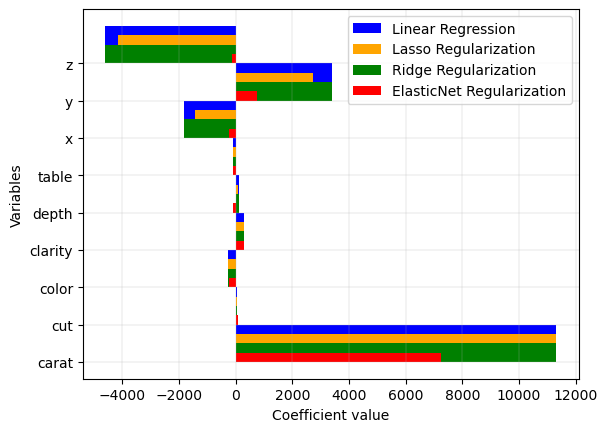

In [97]:
plt.barh(lr_x, lr_y, 1.0, align='edge', color="blue", label="Linear Regression")
plt.barh(lasso_x, lasso_y, 0.75, align='edge', color="orange", label="Lasso Regularization")
plt.barh(ridge_x, ridge_y, 0.5, align='edge', color="green", label="Ridge Regularization")
plt.barh(elasticnet_x, elasticnet_y, 0.25, align='edge', color="red", label="ElasticNet Regularization")
plt.grid(linewidth=0.2)
plt.xlabel("Coefficient value")
plt.ylabel("Variables")
plt.legend(loc='best')
plt.show()

### 4.3. Model selection cho Ridge Regression, Lasso Regression dùng phương pháp holdout

In [122]:
# Chia dữ liệu thành 2 tập train_val và test set với tỷ lệ 80/20
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Tiếp theo, chia tập train_val thành 2 tập train và validation set với tỷ lệ 75/25
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size = 0.25, random_state = 42)

#### 4.3.1. Ridge Regression

In [123]:
# Create three lists for train, validation, and test MSE
train_mse = []
val_mse = []
test_mse = []

# List of hyper-parameter values 
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 1e2, 1e3, 1e4]

# Loop over all the alpha values
for alpha in alphas:
    # Tạo mô hình Ridge regression với tham số alpha
    ridge_reg = Ridge(alpha)

    # Fit mô hình trên train data
    ridge_reg.fit(X_train, y_train)
    
    # Predict trên train set 
    y_train_pred = ridge_reg.predict(X_train)
    
    # Predict trên validation set 
    y_val_pred = ridge_reg.predict(X_val)

    # Predict trên test set 
    y_test_pred = ridge_reg.predict(X_test)
    
    # Tính train, validation, và test MSE
    mse_train = mean_squared_error(y_train, y_train_pred) 
    mse_val = mean_squared_error(y_val, y_val_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    # Thêm các MSE vào các list tương ứng
    train_mse.append(mse_train)
    val_mse.append(mse_val)
    test_mse.append(mse_test)
    
    # In ra train, validation, và test MSE theo alpha
    print('alpha: {:7} | train mse: {:11} | val mse: {:11} | test mse: {:9}'.
          format(alpha, round(mse_train, 2), round(mse_val, 2), round(mse_test, 2)))

alpha:  0.0001 | train mse:  1793909.12 | val mse:  1847489.06 | test mse: 1757351.68
alpha:   0.001 | train mse:  1793909.12 | val mse:  1847489.23 | test mse: 1757351.9
alpha:    0.01 | train mse:  1793909.13 | val mse:  1847490.92 | test mse: 1757354.16
alpha:     0.1 | train mse:  1793909.76 | val mse:  1847508.05 | test mse: 1757376.99
alpha:       1 | train mse:  1793968.56 | val mse:  1847699.24 | test mse: 1757635.13
alpha:      10 | train mse:  1797343.43 | val mse:  1850675.71 | test mse: 1761825.47
alpha:   100.0 | train mse:  1885562.78 | val mse:  1925429.85 | test mse: 1847900.84
alpha:  1000.0 | train mse:   2460429.5 | val mse:  2476997.11 | test mse: 2402530.31
alpha: 10000.0 | train mse:  2943959.23 | val mse:  2956206.32 | test mse: 2839180.49


In [124]:
best_index = val_mse.index(min(val_mse))
# Chọn giá trị alpha (hyper-parameter), cho val mse nhỏ nhất trên validation data 
best_alpha = alphas[best_index]

# In ra best alpha (hyper-parameter)
print(f'The best alpha (hyper-parameter) value, alpha = {best_alpha}')

The best alpha (hyper-parameter) value, alpha = 0.0001


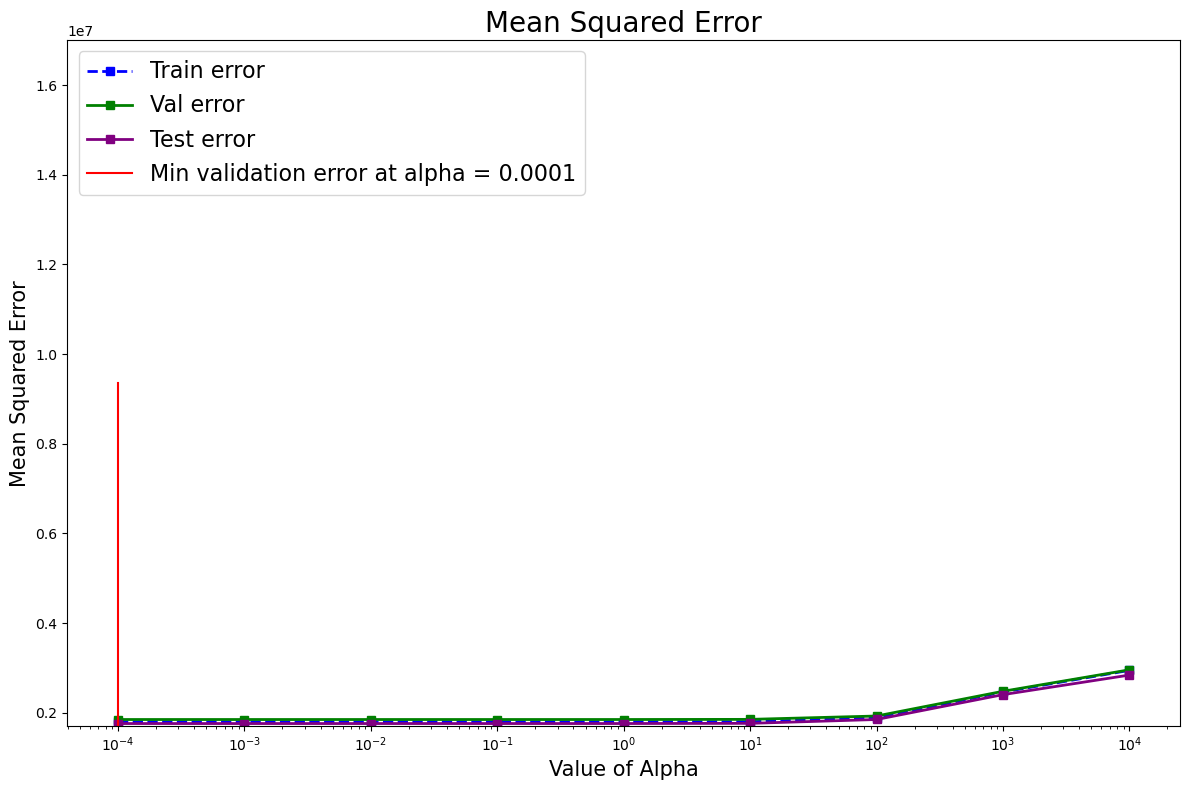

In [125]:
fig, ax = plt.subplots(figsize = (12, 8))

# Vẽ biểu đồ train MSE theo các giá trị alpha
ax.plot(alphas, train_mse, 's--', label = 'Train error', color = 'blue', linewidth = 2)

# Vẽ biểu đồ validation MSE theo các giá trị alpha
ax.plot(alphas, val_mse, 's-', label = 'Val error',color ='green', linewidth = 2)

# Vẽ biểu đồ test MSE theo các giá trị alpha
ax.plot(alphas, test_mse, 's-', label = 'Test error',color ='purple', linewidth = 2)

# Vẽ đường thẳng đứng ứng với best alpha
ax.axvline(best_alpha, 0, 0.5, color = 'r', label = f'Min validation error at alpha = {best_alpha}')

ax.set_xlabel('Value of Alpha', fontsize = 15)
ax.set_ylabel('Mean Squared Error',fontsize = 15)
ax.set_ylim([1700000, 17000000])
ax.legend(loc = 'upper left', fontsize = 16)
ax.set_title('Mean Squared Error', fontsize = 20)
ax.set_xscale('log')
plt.tight_layout()
plt.show();


In [126]:
# Tạo một Ridge Regression model với best alpha 
model = Ridge(best_alpha)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

results_train['Ridge Holdout'] = [
    r2_score(y_train, y_train_pred),
    mean_squared_error(y_train, y_train_pred),
    mean_absolute_error(y_train, y_train_pred)
]

results_val['Ridge Holdout'] = [
    r2_score(y_val, y_val_pred),
    mean_squared_error(y_val, y_val_pred),
    mean_absolute_error(y_val, y_val_pred)
]

results_test['Ridge Holdout'] = [r2, mse, mae]

print(f'R-squared (R²): {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

R-squared (R²): 0.8842911357760717
Mean Squared Error (MSE): 1757351.680110433
Mean Absolute Error (MAE): 851.8849390387389


#### 4.3.2. Lasso Regression

In [127]:
# Create three lists for train, validation, and test MSE
train_mse = []
val_mse = []
test_mse = []

# List of hyper-parameter values
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 1e2, 1e3, 1e4]

# Loop over all the alpha values
for alpha in alphas:
    # Tạo một Lasso regression với tham số alpha
    lasso_reg = Lasso(alpha=alpha)

    # Fit mô hình trên train data
    lasso_reg.fit(X_train, y_train)

    # Predict trên train set
    y_train_pred = lasso_reg.predict(X_train)

    # Predict trên validation set
    y_val_pred = lasso_reg.predict(X_val)

    # Predict trên test set
    y_test_pred = lasso_reg.predict(X_test)

    # Tính train, validation, và test MSE
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_val = mean_squared_error(y_val, y_val_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Thêm các MSE vào các list tương ứng
    train_mse.append(mse_train)
    val_mse.append(mse_val)
    test_mse.append(mse_test)

    # In ra train, validation, và test MSE theo alpha
    print('alpha: {:7} | train mse: {:11} | val mse: {:11} | test mse: {}'.
          format(alpha, round(mse_train, 2), round(mse_val, 2), round(mse_test, 2)))

alpha:  0.0001 | train mse:  1794620.66 | val mse:  1849250.04 | test mse: 1757900.1


d:\Anaconda\envs\mlclass\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.902e+10, tolerance: 5.191e+07
  model = cd_fast.enet_coordinate_descent(
d:\Anaconda\envs\mlclass\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.896e+10, tolerance: 5.191e+07
  model = cd_fast.enet_coordinate_descent(


alpha:   0.001 | train mse:  1794622.22 | val mse:  1849253.07 | test mse: 1757902.86


d:\Anaconda\envs\mlclass\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.840e+10, tolerance: 5.191e+07
  model = cd_fast.enet_coordinate_descent(
d:\Anaconda\envs\mlclass\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.338e+10, tolerance: 5.191e+07
  model = cd_fast.enet_coordinate_descent(


alpha:    0.01 | train mse:  1794638.05 | val mse:  1849283.52 | test mse: 1757930.64
alpha:     0.1 | train mse:  1794817.53 | val mse:  1849602.87 | test mse: 1758226.61
alpha:       1 | train mse:  1798604.03 | val mse:  1854182.91 | test mse: 1762819.12
alpha:      10 | train mse:  1838799.04 | val mse:  1886823.72 | test mse: 1803214.87
alpha:   100.0 | train mse:  2264365.25 | val mse:  2288603.43 | test mse: 2206762.2
alpha:  1000.0 | train mse:  4166586.09 | val mse:  4186762.59 | test mse: 3970480.81
alpha: 10000.0 | train mse: 16049742.75 | val mse: 16143902.17 | test mse: 15195440.44


d:\Anaconda\envs\mlclass\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.435e+09, tolerance: 5.191e+07
  model = cd_fast.enet_coordinate_descent(


In [128]:
best_index = val_mse.index(min(val_mse))
# Chọn giá trị alpha (hyper-parameter), cho val mse nhỏ nhất trên validation data 
best_alpha = alphas[best_index]

# In ra best alpha (hyper-parameter)
print(f'The best alpha (hyper-parameter) value, alpha = {best_alpha}')

The best alpha (hyper-parameter) value, alpha = 0.0001


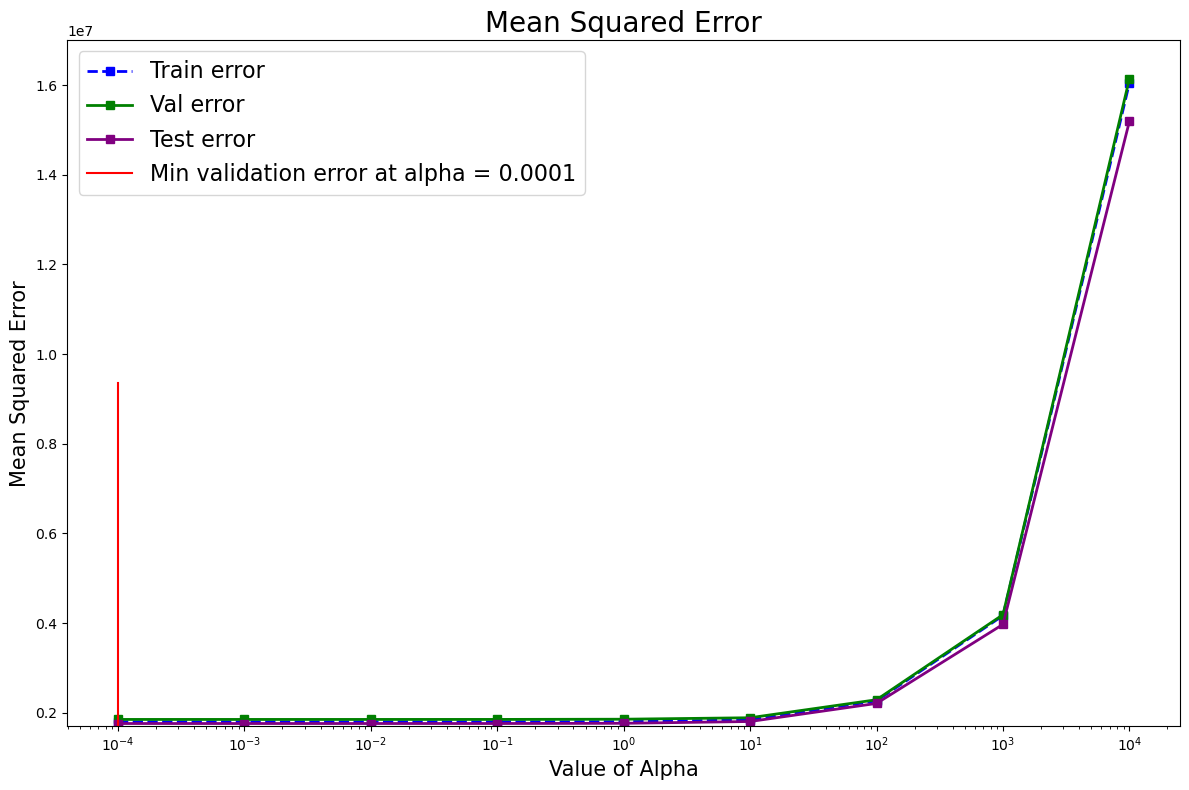

In [129]:
fig, ax = plt.subplots(figsize = (12, 8))

# Vẽ biểu đồ train MSE theo các giá trị alpha
ax.plot(alphas, train_mse, 's--', label = 'Train error', color = 'blue', linewidth = 2)

# Vẽ biểu đồ validation MSE theo các giá trị alpha
ax.plot(alphas, val_mse, 's-', label = 'Val error',color ='green', linewidth = 2)

# Vẽ biểu đồ test MSE theo các giá trị alpha
ax.plot(alphas, test_mse, 's-', label = 'Test error',color ='purple', linewidth = 2)

# Vẽ đường thẳng đứng ứng với best alpha
ax.axvline(best_alpha, 0, 0.5, color = 'r', label = f'Min validation error at alpha = {best_alpha}')

ax.set_xlabel('Value of Alpha', fontsize = 15)
ax.set_ylabel('Mean Squared Error',fontsize = 15)
ax.set_ylim([1700000, 17000000])
ax.legend(loc = 'upper left', fontsize = 16)
ax.set_title('Mean Squared Error', fontsize = 20)
ax.set_xscale('log')
plt.tight_layout()
plt.show();

In [130]:
# Tạo một Lasso Regression model với best alpha 
model = Lasso(best_alpha)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

results_train['Lasso Holdout'] = [
    r2_score(y_train, y_train_pred),
    mean_squared_error(y_train, y_train_pred),
    mean_absolute_error(y_train, y_train_pred)
]

results_val['Lasso Holdout'] = [
    r2_score(y_val, y_val_pred),
    mean_squared_error(y_val, y_val_pred),
    mean_absolute_error(y_val, y_val_pred)
]

results_test['Lasso Holdout'] = [r2, mse, mae]

print(f'R-squared (R²): {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

R-squared (R²): 0.8842550265002612
Mean Squared Error (MSE): 1757900.0970095063
Mean Absolute Error (MAE): 850.5719963732839


d:\Anaconda\envs\mlclass\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.902e+10, tolerance: 5.191e+07
  model = cd_fast.enet_coordinate_descent(


### 4.4. Model selection cho Ridge Regression, Lasso Regression dùng phương pháp cross validation

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 4.4.1. Ridge Regression

In [140]:
alphas = (0.001, 0.01, 0.1, 1, 10, 100, 1000)

# Dùng k-fold cross validation cho Ridge với các giá trị alpha ở trên và cv là k
k = 5
ridge_reg = RidgeCV(alphas=alphas, cv=k).fit(X_train, y_train)

y_train_pred = ridge_reg.predict(X_train)
y_test_pred = ridge_reg.predict(X_test)

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

results_train['Ridge CV'] = [
    r2_score(y_train, y_train_pred),
    mean_squared_error(y_train, y_train_pred),
    mean_absolute_error(y_train, y_train_pred)
]

results_test['Ridge CV'] = [r2, mse, mae]

ridge_alpha = ridge_reg.alpha_
print('Best alpha for ridge: {}'.format(ridge_alpha))
print(f'R-squared (R²): {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Best alpha for ridge: 1.0
R-squared (R²): 0.8843277283758404
Mean Squared Error (MSE): 1756795.9226313955
Mean Absolute Error (MAE): 854.215267853507


#### 4.4.2. Lasso Regression

In [141]:
alphas = (0.001, 0.01, 0.1, 1, 10, 100, 1000)

# Dùng k-fold cross validation cho Ridge với các giá trị alpha ở trên và cv là k
k = 5
lasso_reg = LassoCV(alphas=alphas, cv=k).fit(X_train, y_train)

y_train_pred = lasso_reg.predict(X_train)
y_test_pred = lasso_reg.predict(X_test)

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

results_train['Lasso CV'] = [
    r2_score(y_train, y_train_pred),
    mean_squared_error(y_train, y_train_pred),
    mean_absolute_error(y_train, y_train_pred)
]

results_test['Lasso CV'] = [r2, mse, mae]

lasso_alpha = lasso_reg.alpha_
print('Best alpha for ridge: {}'.format(lasso_alpha))
print(f'R-squared (R²): {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

d:\Anaconda\envs\mlclass\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4459340837.368683, tolerance: 55814865.80816296
  model = cd_fast.enet_coordinate_descent_gram(
d:\Anaconda\envs\mlclass\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20541280809.830013, tolerance: 55814865.80816296
  model = cd_fast.enet_coordinate_descent_gram(
d:\Anaconda\envs\mlclass\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25039916754.132008, tolerance: 55814865.80816296
  model = cd_fast.enet_coordinate_descent_gram(
d:\Anaconda\envs\mlclass\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: 

Best alpha for ridge: 0.1
R-squared (R²): 0.8842848841157072
Mean Squared Error (MSE): 1757446.6284613537
Mean Absolute Error (MAE): 852.6067879448227


d:\Anaconda\envs\mlclass\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.248e+10, tolerance: 6.932e+07
  model = cd_fast.enet_coordinate_descent(


## 5. So sánh hiệu xuất các mô hình

### 5.1. Tập train

In [142]:
dataframe_results = pd.DataFrame.from_dict(results_train, orient='index', columns=[
    'R-squared (R²)',
    'Mean Squared Error (MSE)',
    'Mean Absolute Error (MAE)'
])

dataframe_results

,R-squared (R²),Mean Squared Error (MSE),Mean Absolute Error (MAE)
K-NN,0.967435,5.234187e+05,387.655045
Linear Regression,0.887576,1.807023e+06,855.321612
Ridge Linear Regression,0.887576,1.807023e+06,855.325161
Lasso Linear Regression,0.887518,1.807958e+06,854.029416
ElasticNet Linear Regression,0.877471,1.969445e+06,956.508169
Ridge Holdout,0.888228,1.793909e+06,851.633064
Lasso Holdout,0.888184,1.794621e+06,850.477685
Ridge CV,0.887573,1.807063e+06,855.680806
Lasso CV,0.887504,1.808177e+06,854.182229


### 5.2. Tập val

In [143]:
dataframe_results = pd.DataFrame.from_dict(results_val, orient='index', columns=[
    'R-squared (R²)',
    'Mean Squared Error (MSE)',
    'Mean Absolute Error (MAE)'
])

dataframe_results

,R-squared (R²),Mean Squared Error (MSE),Mean Absolute Error (MAE)
Ridge Holdout,0.885560,1.847489e+06,857.861379
Lasso Holdout,0.885451,1.849250e+06,856.520651


### 5.3. Tập test

In [148]:
dataframe_results = pd.DataFrame.from_dict(results_test, orient='index', columns=[
    'R-squared (R²)',
    'Mean Squared Error (MSE)',
    'Mean Absolute Error (MAE)'
])

dataframe_results

,R-squared (R²),Mean Squared Error (MSE),Mean Absolute Error (MAE)
K-NN,0.944382,8.447110e+05,479.175292
Linear Regression,0.884340,1.756603e+06,853.781371
Ridge Linear Regression,0.884340,1.756604e+06,853.785607
Lasso Linear Regression,0.884305,1.757146e+06,852.410081
ElasticNet Linear Regression,0.873556,1.920393e+06,954.232212
Ridge Holdout,0.884291,1.757352e+06,851.884939
Lasso Holdout,0.884255,1.757900e+06,850.571996
Ridge CV,0.884328,1.756796e+06,854.215268
Lasso CV,0.884285,1.757447e+06,852.606788


Nhận xét:
- Mô hình K-NN có R² rất cao, cho thấy mô hình giải thích được phần lớn phương sai của biến mục tiêu. MSE và MAE thấp, cho thấy mô hình có dự đoán gần với giá trị thực tế.
- Các mô hình Linear Regression, Ridge Regression và Lasso Regression có R² tương đối cao, cho thấy các mô hình này phù hợp với dữ liệu tốt. MSE và MAE của các mô hình này khá gần nhau, cho thấy chúng có độ chính xác dự đoán tương đối tốt.
- ElasticNet và Ridge Holdout, Lasso Holdout, Ridge CV và Lasso CV có R² và MSE/MAE không thay đổi nhiều so với các phương pháp khác